-0.92
-0.9
-0.89
-0.84
-0.94
-0.99
-0.98
-0.98
avg
-0.9294548466389363


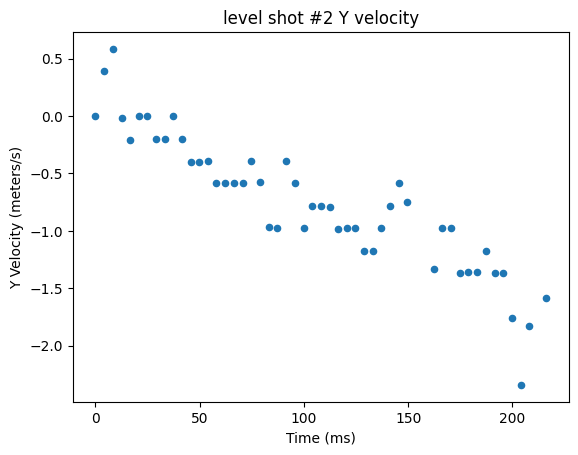

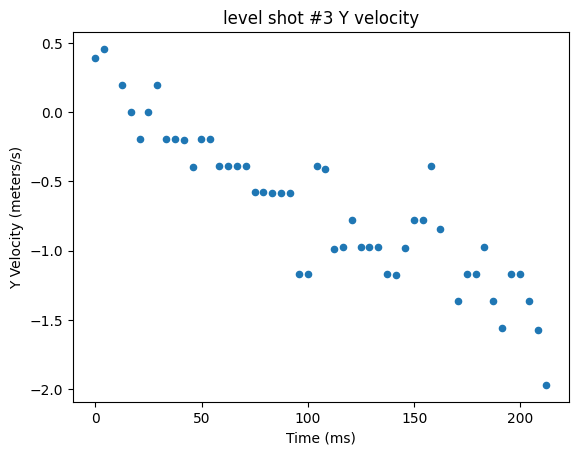

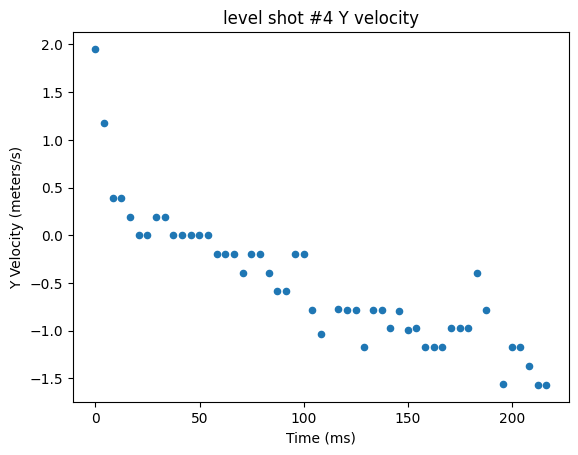

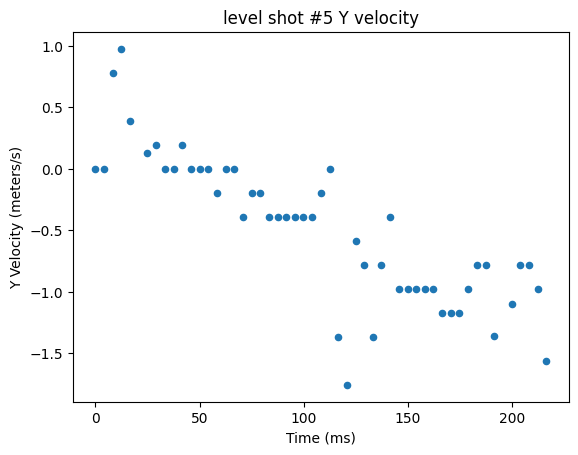

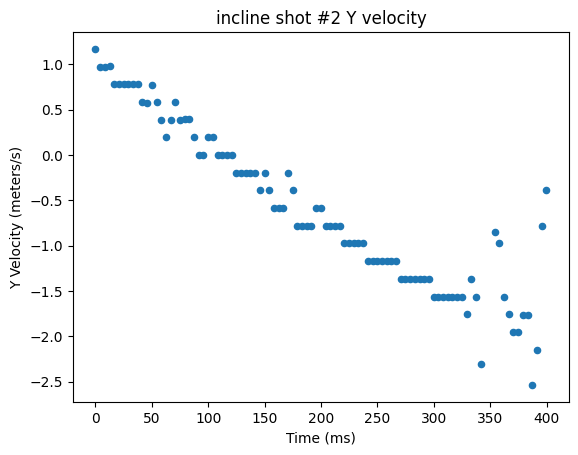

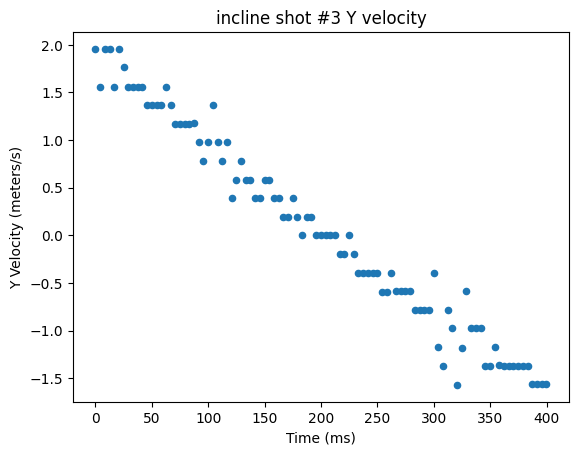

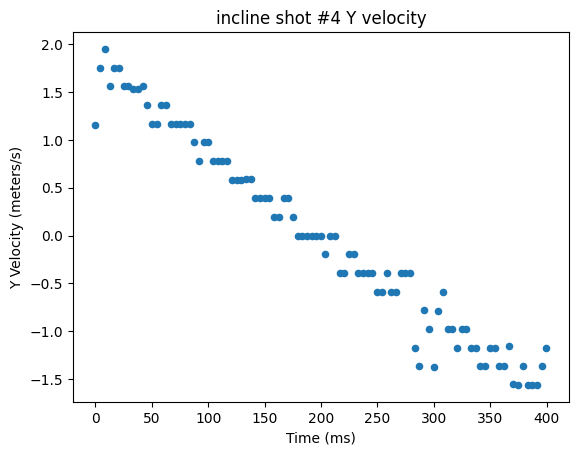

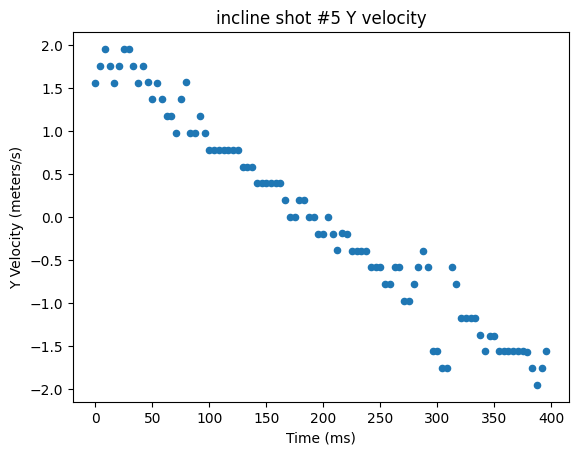

In [32]:
import pandas as pd
import numpy as np
import scipy.stats as ss

coef_list = []
for test_type, mscut in zip(
    ['level', 'incline'],
    [220, 400]
):
    for x in [1, 2, 3, 4]:
        infile = f'/home/jbuist/git/phy230/ballshot/trimmed/{test_type}{x}.csv'
        if x == 4 and test_type == 'incline':
            infile = f'/home/jbuist/git/phy230/ballshot/trimmed/{test_type}5.csv'
        df = pd.read_csv(infile)
        first_ms = df.ms[0]
        df['fixedms'] = df.ms - first_ms
        df = df[ df.fixedms <= mscut ]
        df['xvel'] = np.gradient(df.xpos, df.seconds)
        df['yvel'] = np.gradient(df.ypos, df.seconds)

        fit = ss.linregress(df.fixedms, df.yvel)
        coef_list.append(fit.rvalue)
        print(round(fit.rvalue, 2))

        df.plot.scatter(x='fixedms', y='yvel', legend=False,
                        title=f'{test_type} shot #{x+1} Y velocity',
                        ylabel='Y Velocity (meters/s)', xlabel='Time (ms)').get_figure().savefig(f'{test_type}{x+1}_yvel.png')

print('avg')
print(
    np.mean(coef_list)
)